In [ ]:
import musdb
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
mus_train = musdb.DB(root='/content/drive/MyDrive/musdb18', subsets="train")

In [ ]:
# Function to extract spectrograms and labels for the model
def extract_spectrograms_labels(track):
    # Load the audio file
    audio, sr = librosa.load(track.path, sr=None, mono=True)

    # Generate spectrogram
    hop_length = 512  # Adjust as needed
    n_fft = 2048  # Adjust as needed
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Resize spectrogram to a fixed shape (e.g., 128x128)
    target_shape = (128, 128)  # Adjust as needed
    #spectrogram = librosa.util.fix_length(spectrogram, target_shape[1], axis=1)

    # Crop or pad the spectrogram to the target shape
    if spectrogram.shape[1] > target_shape[1]:
        spectrogram = spectrogram[:, :target_shape[1]]
    else:
        pad_width = target_shape[1] - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')

    # Placeholder label generation (modify this for your task)
    label = np.random.randint(2)  # Placeholder random label (binary classification)

    return spectrogram, label

In [ ]:
# Extract spectrograms and labels for training
X_train = []
y_train = []

In [ ]:
for track in mus_train:
    spectrogram, label = extract_spectrograms_labels(track)
    X_train.append(spectrogram)
    y_train.append(label)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Reshape the data for 2D CNN input (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

In [ ]:
#Define the CNN Model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1025, 128, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1023, 126, 16)     160       
                                                                 
 conv2d_3 (Conv2D)           (None, 1021, 124, 16)     2320      
                                                                 
 flatten_1 (Flatten)         (None, 2025664)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               259285120 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 259287729 (989.10 MB)
Trainable params: 259287729 (989.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mus_test = musdb.DB(root='/content/drive/MyDrive/musdb18', subsets="test")

In [ ]:
# Extract features and labels for testing
X_test = []
y_test = []

for track in mus_test:
    features, target = extract_spectrograms_labels(track)
    X_test.append(features)
    y_test.append(target)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

2/2 [==============================] - 0s 32ms/step


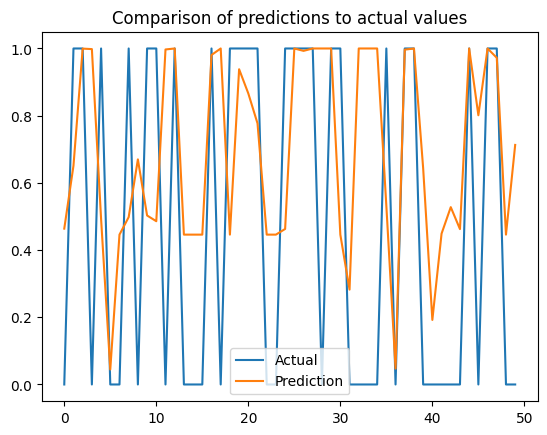

In [ ]:
# Predict using the pre-trained model
predictions = model.predict(X_test)

# Plot predictions against actual values
plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend()
plt.show()

In [ ]:
track = X_test[2]

NameError: ignored